# Proyecto práctico (Clasificación multiclase)

El dataset tiene 150 filas y 4 columnas (características).
Primeras filas del dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  

Distribución de clases:
target_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Estadísticas descriptivas:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.8433

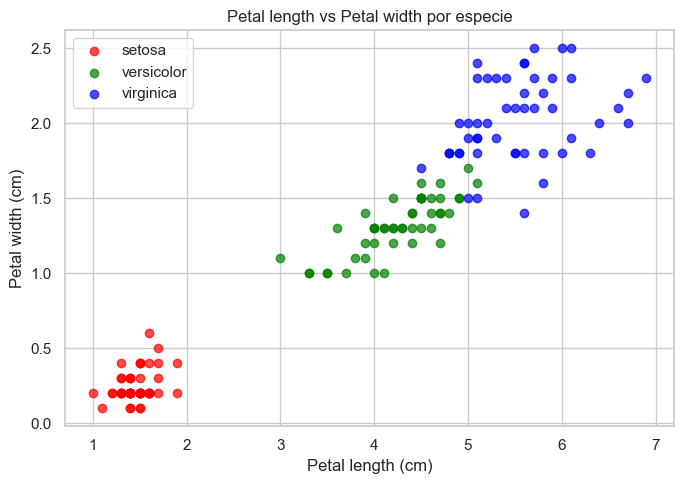

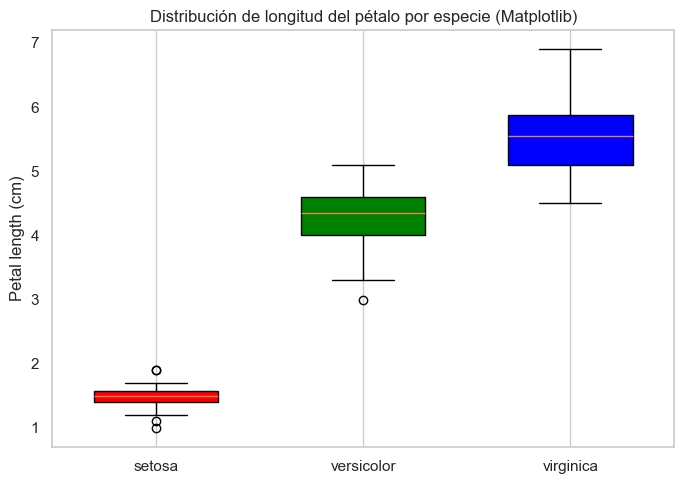


Visualización con Seaborn:


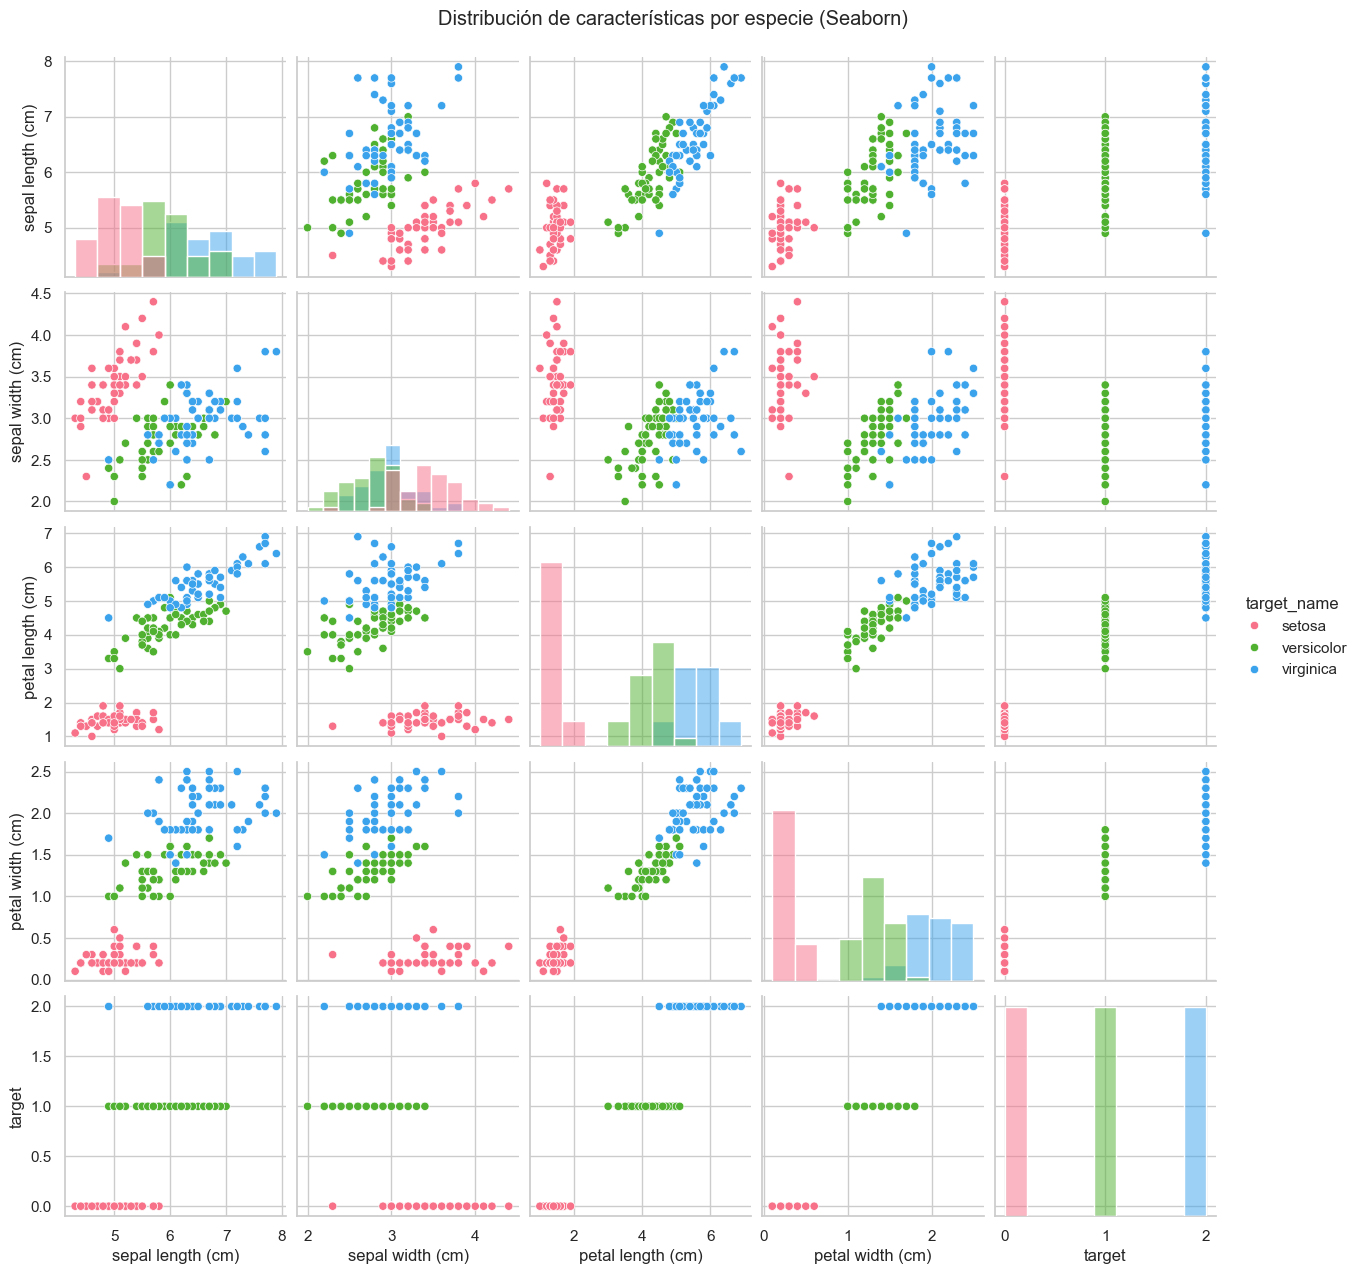

C:\Users\AdrianGilGamboa\AppData\Local\Temp\ipykernel_27588\673377623.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='target_name', y='petal length (cm)', palette='pastel')  # Boxplot con seaborn


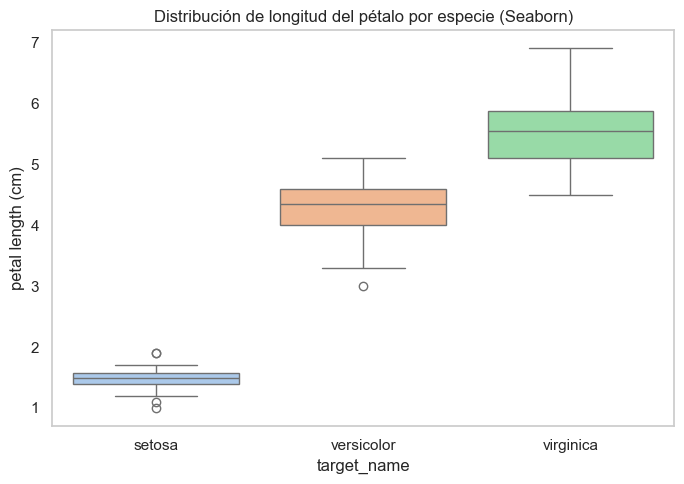


Validación cruzada (5 folds):
Scores por fold: [0.98 0.96 0.94]
Precisión media: 0.9600
Desviación estándar: 0.0163


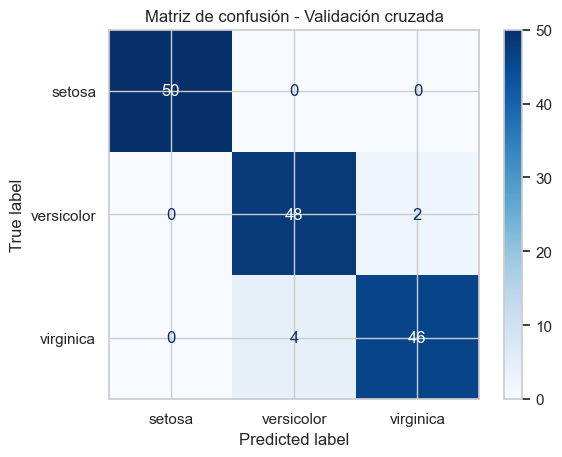


Informe de clasificación (validación cruzada):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.96      0.94        50
   virginica       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [12]:
# --- LIBRERÍAS ---
import pandas as pd  # Manipulación de datos en forma de DataFrame
import numpy as np  # Operaciones numéricas con arrays
import matplotlib.pyplot as plt  # Visualización de gráficos básicos
import seaborn as sns  # Visualización avanzada con estilo
from sklearn.datasets import load_iris  # Carga del dataset Iris integrado en sklearn
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict  # Validación cruzada estratificada
from sklearn.preprocessing import MinMaxScaler  # Escalado de características al rango [0,1]
from sklearn.neighbors import KNeighborsClassifier  # Clasificador KNN
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay  # Métricas de evaluación

# --- 1. CARGA DEL DATASET ---
iris = load_iris()  # Carga el dataset Iris
X = iris.data  # Características (longitud y ancho de sépalos y pétalos)
y = iris.target  # Etiquetas de clase (0, 1 o 2)
feature_names = iris.feature_names  # Nombres de las características
target_names = iris.target_names  # Nombres de las clases

# Mostrar número de filas y columnas
print(f"El dataset tiene {X.shape[0]} filas y {X.shape[1]} columnas (características).")

# --- 2. TRANSFORMACIÓN A DATAFRAME ---
df = pd.DataFrame(X, columns=feature_names)  # Convierte X en un DataFrame con nombres de columnas
df['target'] = y  # Añade la columna de etiquetas numéricas
df['target_name'] = df['target'].apply(lambda x: target_names[x])  # Añade el nombre de la especie a partir del número

# --- 3. ANÁLISIS EXPLORATORIO ---
print("Primeras filas del dataset:")
print(df.head())  # Muestra las primeras 5 filas del DataFrame

print("\nDistribución de clases:")
print(df['target_name'].value_counts())  # Muestra el número de muestras por clase

print("\nEstadísticas descriptivas:")
print(df.describe())  # Muestra estadísticas básicas de las características numéricas

# --- OPCIÓN A: Visualización con matplotlib ---
print("\nVisualización con Matplotlib:")

# Diagrama de dispersión: petal length vs petal width, coloreado por clase
plt.figure(figsize=(7, 5))  # Define el tamaño del gráfico
colors = ['red', 'green', 'blue']  # Colores para cada clase
for i, target in enumerate(np.unique(y)):  # Itera por cada clase
    plt.scatter(
        df[df['target'] == target]['petal length (cm)'],  # Eje X
        df[df['target'] == target]['petal width (cm)'],   # Eje Y
        color=colors[i], label=target_names[target], alpha=0.7  # Color, etiqueta y transparencia
    )
plt.xlabel("Petal length (cm)")  # Etiqueta del eje X
plt.ylabel("Petal width (cm)")  # Etiqueta del eje Y
plt.title("Petal length vs Petal width por especie")  # Título del gráfico
plt.legend()  # Añade leyenda
plt.grid(True)  # Añade rejilla
plt.tight_layout()  # Ajusta márgenes
plt.show()  # Muestra el gráfico

# Boxplot de longitud del pétalo por especie (sin seaborn)
plt.figure(figsize=(7, 5))  # Tamaño del gráfico
for i, target in enumerate(np.unique(y)):  # Itera por clase
    plt.boxplot(df[df['target'] == target]['petal length (cm)'],  # Datos de longitud del pétalo
                positions=[i],  # Posición en el eje X
                widths=0.6,  # Ancho del boxplot
                patch_artist=True,  # Relleno de color
                boxprops=dict(facecolor=colors[i]))  # Color de cada clase
plt.xticks([0, 1, 2], target_names)  # Nombres de clase en el eje X
plt.ylabel("Petal length (cm)")  # Etiqueta eje Y
plt.title("Distribución de longitud del pétalo por especie (Matplotlib)")  # Título
plt.grid(axis='y')  # Rejilla horizontal
plt.tight_layout()
plt.show()

# --- OPCIÓN B: Visualización con seaborn ---
print("\nVisualización con Seaborn:")

# Pairplot: muestra relaciones entre todas las características
sns.pairplot(df, hue='target_name', diag_kind='hist', palette='husl')  # Gráfico de pares por clase
plt.suptitle("Distribución de características por especie (Seaborn)", y=1.02)  # Título global
plt.show()

# Boxplot con seaborn de longitud del pétalo
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='target_name', y='petal length (cm)', palette='pastel')  # Boxplot con seaborn
plt.title("Distribución de longitud del pétalo por especie (Seaborn)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# --- 4. PREPROCESAMIENTO ---
scaler = MinMaxScaler()  # Crea el objeto para escalar entre 0 y 1
X_scaled = scaler.fit_transform(X)  # Aplica el escalado a las características

# --- 5. MODELO Y VALIDACIÓN CRUZADA ---
knn = KNeighborsClassifier(n_neighbors=10)  # Instancia del clasificador KNN con k=10
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)  # Validación cruzada estratificada con 3 particiones

# Obtiene los scores (precisión) para cada fold
scores = cross_val_score(knn, X_scaled, y, cv=cv, scoring='accuracy')  # Evalúa el modelo con validación cruzada
print("\nValidación cruzada (5 folds):")
print(f"Scores por fold: {scores}")  # Muestra los scores por partición
print(f"Precisión media: {scores.mean():.4f}")  # Media de precisión
print(f"Desviación estándar: {scores.std():.4f}")  # Desviación de precisión

# Predicciones para cada muestra en validación cruzada
y_pred_cv = cross_val_predict(knn, X_scaled, y, cv=cv)  # Predice cada instancia una vez usando el modelo entrenado sin ella

# --- 6. EVALUACIÓN ---
cm = confusion_matrix(y, y_pred_cv)  # Calcula la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)  # Visualizador de la matriz
disp.plot(cmap=plt.cm.Blues)  # Dibuja la matriz con escala de azules
plt.title("Matriz de confusión - Validación cruzada")
plt.show()

# Informe con precisión, recall y F1-score por clase
print("\nInforme de clasificación (validación cruzada):")
print(classification_report(y, y_pred_cv, target_names=target_names))  # Imprime métricas por clase
